In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
df = pd.read_csv('./data/alzheimers_prediction_dataset.csv')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,74283.0,71.964703,12.980748,50.0,61.0,72.0,83.0,94.0
Education Level,74283.0,9.487514,5.757020,0.0,4.0,9.0,14.0,19.0
BMI,74283.0,26.780639,4.764679,18.5,22.7,26.8,30.9,35.0
Cognitive Test Score,74283.0,64.654241,20.153247,30.0,47.0,65.0,82.0,99.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Country,74283,20,Brazil,3839
Gender,74283,2,Female,37249
Physical Activity Level,74283,3,High,24853
Smoking Status,74283,3,Current,24915
Alcohol Consumption,74283,3,Never,24865
Diabetes,74283,2,No,59527
Hypertension,74283,2,No,52134
Cholesterol Level,74283,2,Normal,51973
Family History of Alzheimer’s,74283,2,No,52004
Depression Level,74283,3,Medium,24843


In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Country                                 0.0
Age                                     0.0
Gender                                  0.0
Education Level                         0.0
BMI                                     0.0
Physical Activity Level                 0.0
Smoking Status                          0.0
Alcohol Consumption                     0.0
Diabetes                                0.0
Hypertension                            0.0
Cholesterol Level                       0.0
Family History of Alzheimer’s           0.0
Cognitive Test Score                    0.0
Depression Level                        0.0
Sleep Quality                           0.0
Dietary Habits                          0.0
Air Pollution Exposure                  0.0
Employment Status                       0.0
Marital Status                          0.0
Genetic Risk Factor (APOE-ε4 allele)    0.0
Social Engagement Level                 0.0
Income Level                            0.0
Stress Levels 

In [7]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

No outliers


# EDA : Data Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_12656\351788081.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')
C:\Users\User\AppData\Local\Temp\ipykernel_12656\351788081.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking Status', data=df, palette='muted')
C:\Users\User\AppData\Local\Temp\ipykernel_12656\351788081.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Alzheimer’s Diagnosis", data=df, palette='Set2')


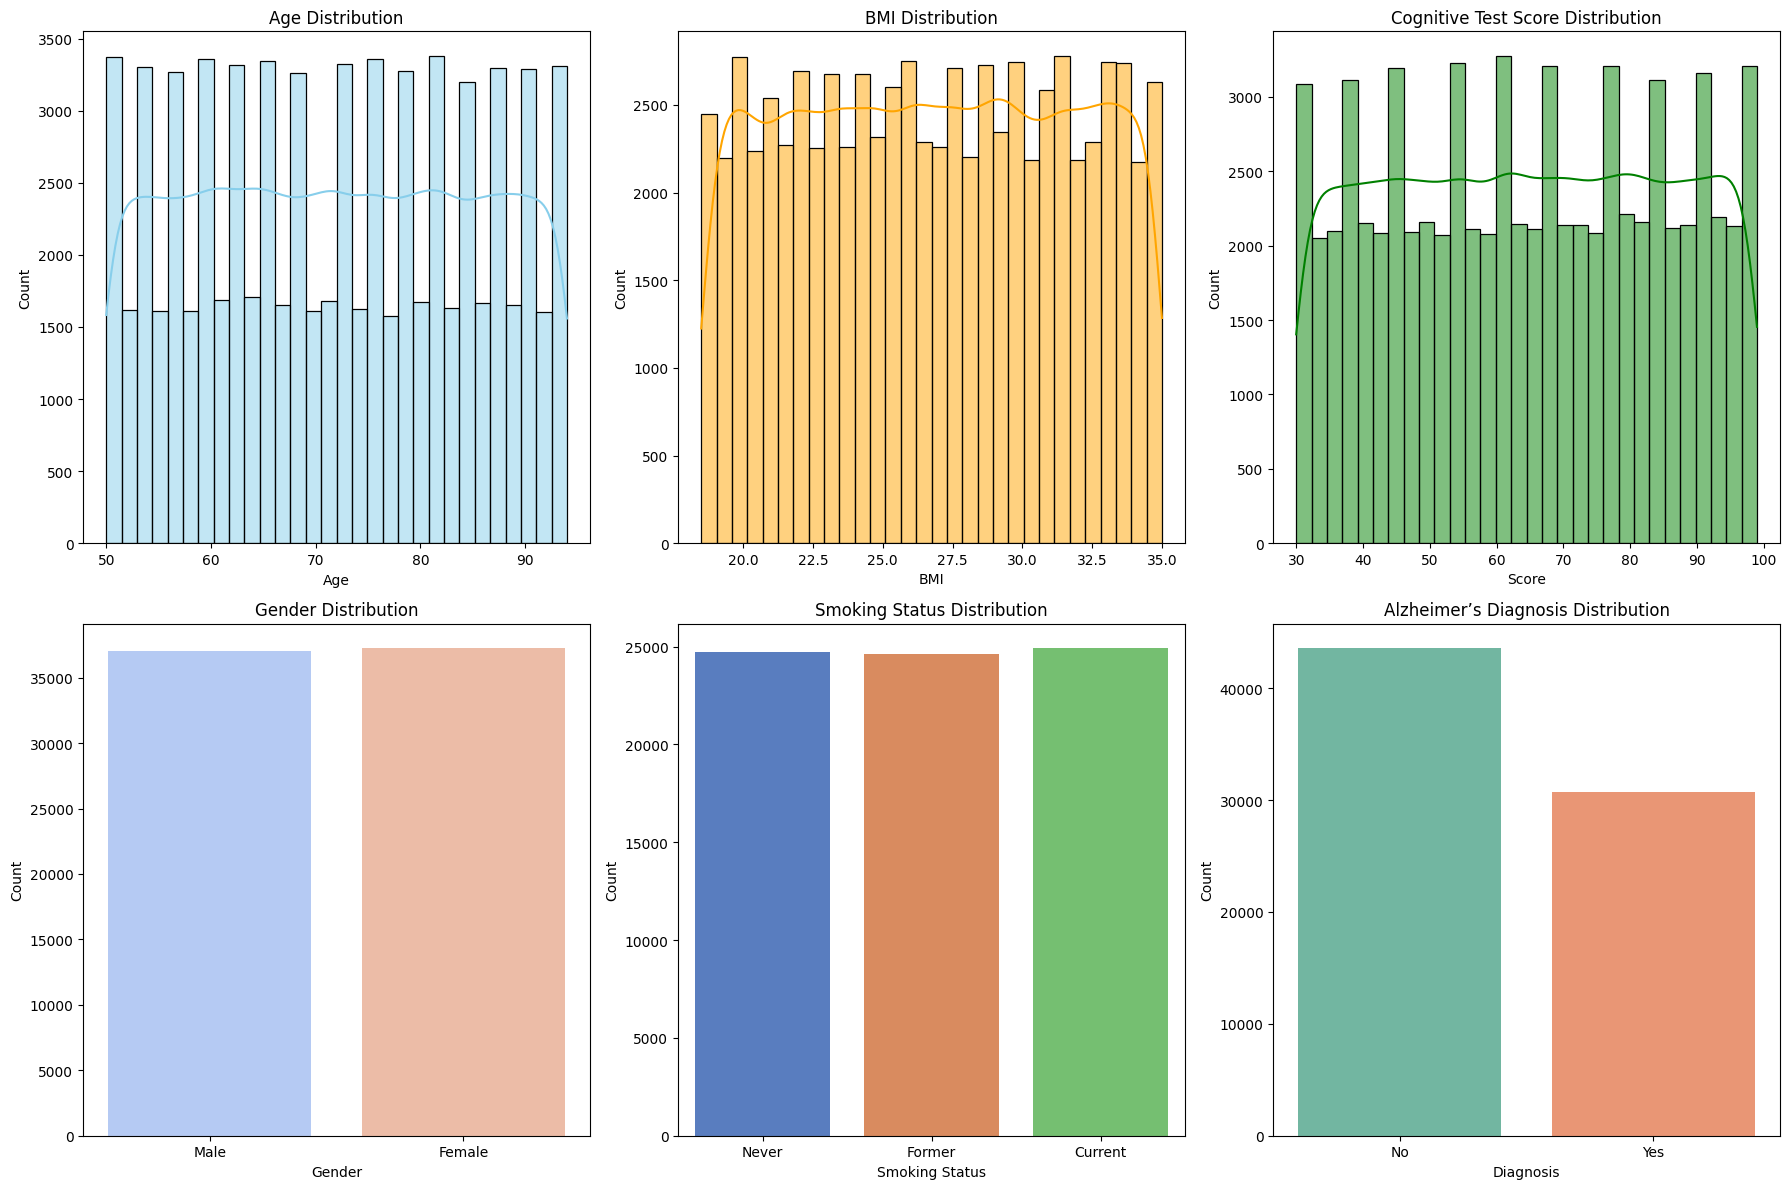

In [8]:
# Set figure size for better visibility
plt.figure(figsize=(18, 12))

# 1. Histogram for Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Histogram for BMI Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['BMI'], bins=30, kde=True, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')

# 3. Histogram for Cognitive Test Score
plt.subplot(2, 3, 3)
sns.histplot(df['Cognitive Test Score'], bins=30, kde=True, color='green')
plt.title('Cognitive Test Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')

# 4. Count plot for Gender Distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 5. Count plot for Smoking Status
plt.subplot(2, 3, 5)
sns.countplot(x='Smoking Status', data=df, palette='muted')
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

# 6. Count plot for Alzheimer’s Diagnosis
plt.subplot(2, 3, 6)
sns.countplot(x="Alzheimer’s Diagnosis", data=df, palette='Set2')
plt.title("Alzheimer’s Diagnosis Distribution")
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show all plots
plt.show()

# EDA : Correlation Analysis

In [9]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:  
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

original_object_cols = list(label_encoders.keys()) 
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_columns_to_scale = [col for col in num_columns if col not in original_object_cols]

scaler = StandardScaler()
df[num_columns_to_scale] = scaler.fit_transform(df[num_columns_to_scale])

print("Scaled Numerical Data:")
df[num_columns_to_scale].head()

Scaled Numerical Data:


,Age,Education Level,BMI,Cognitive Test Score
0,1.389398,-1.474299,1.305314,1.257660
1,0.002719,-0.432087,0.654689,0.017157
2,1.081247,1.652339,-0.814465,-1.074486
3,-1.460997,1.304935,0.927532,0.811079
4,-1.075808,-1.126895,0.675677,-0.776765


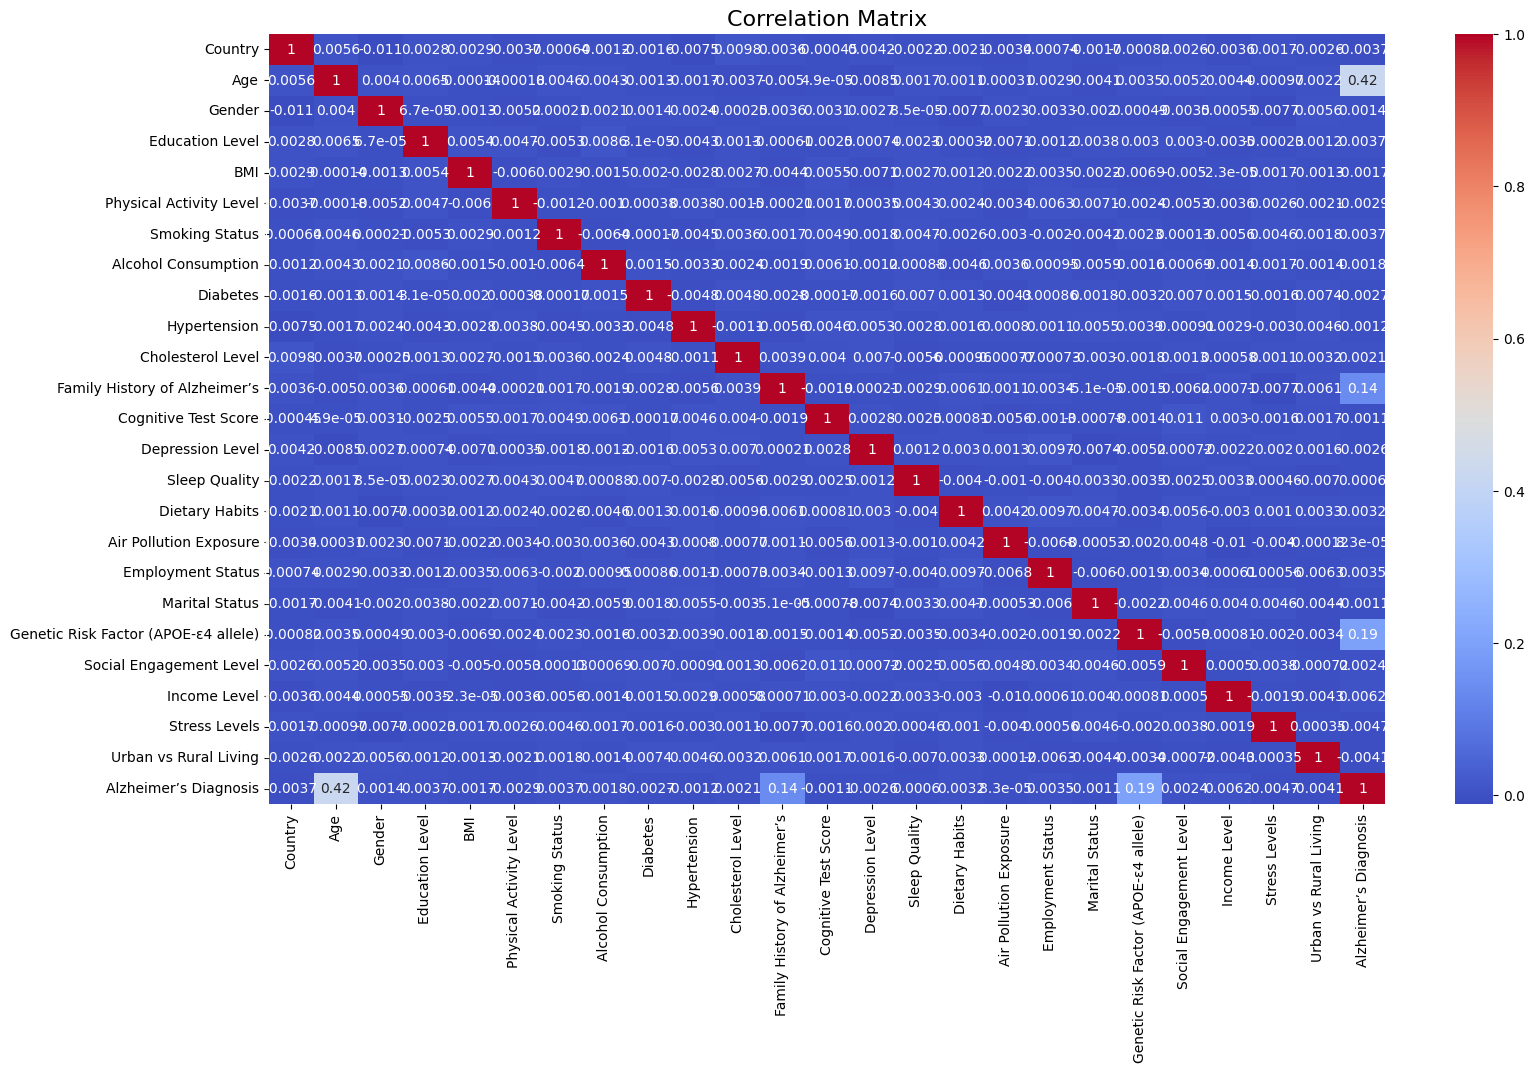

In [10]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

### Alzheimer's disease is associated with 'Age', 'family history of Alzheimer's', and 'Genetic Risk Factor (APOE-ε4 allele)'.

Text(0.5, 1.0, 'Correlation Matrix')

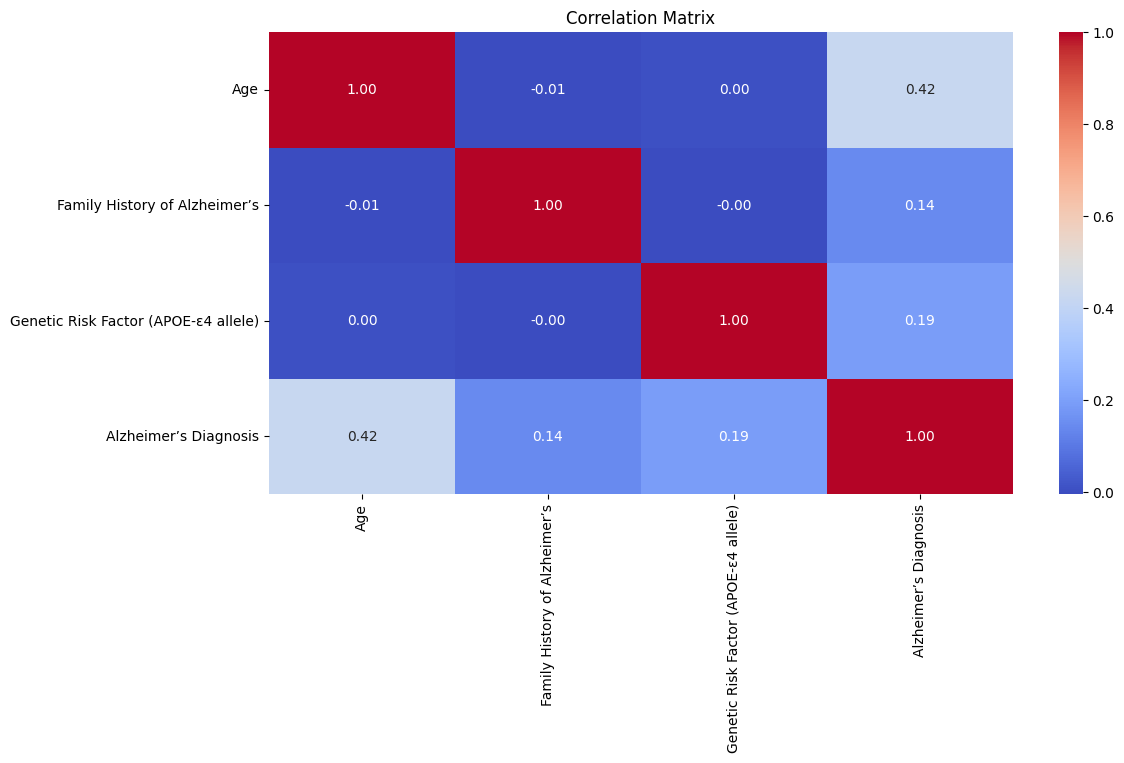

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Age', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)','Alzheimer’s Diagnosis']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

# Comparison of Machine Learning Model Performance

In [12]:
X = df[['Age', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)']]
y = df['Alzheimer’s Diagnosis'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [13]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.711651,0.708753,0.711651,0.708932
1,KNN,0.672343,0.668348,0.672343,0.668972
2,Decision Tree,0.726526,0.732357,0.726526,0.728094
3,Random Forest,0.726526,0.732357,0.726526,0.728094
4,XGBoost,0.726526,0.732357,0.726526,0.728094


# Comparison of Deep Learning Model Performance

In [14]:
def plot_history(history, main_title):
    plt.figure(figsize=(12, 5))

    plt.suptitle(main_title, fontsize=20, fontweight='bold')

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.92]) 
    plt.show()

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,           
    restore_best_weights=True  
)

In [15]:
# NN Model 
simple_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

simple_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn.summary()

history = simple_nn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = simple_nn.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 752us/step - accuracy: 0.7186 - loss: 0.5441 - val_accuracy: 0.7206 - val_loss: 0.5376
Epoch 2/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 746us/step - accuracy: 0.7214 - loss: 0.5398 - val_accuracy: 0.7221 - val_loss: 0.5366
Epoch 3/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 752us/step - accuracy: 0.7227 - loss: 0.5390 - val_accuracy: 0.7220 - val_loss: 0.5344
Epoch 4/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 724us/step - accuracy: 0.7222 - loss: 0.5382 - val_accuracy: 0.7228 - val_loss: 0.5347
Epoch 5/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 725us/step - accuracy: 0.7240 - loss: 0.5371 - val_accuracy: 0.7221 - val_loss: 0.5336
Epoch 6/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 750us/step - accuracy: 0.7246 - loss: 0.5365 - val_accuracy: 0.7248 - val_loss: 0.5328
Epoch 7/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 729us/step - accuracy: 0.7245 - loss: 0.5358 - val_accuracy: 0.7246 - val_loss: 0.5328
Epoch 8/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 761us/step - accuracy: 0.7251 -

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
Accuracy: 0.7252


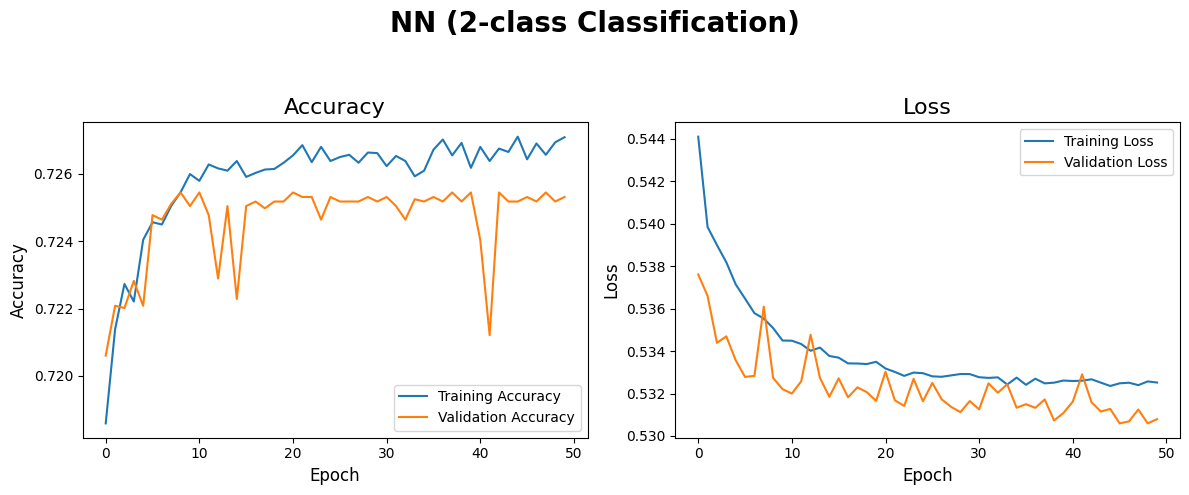

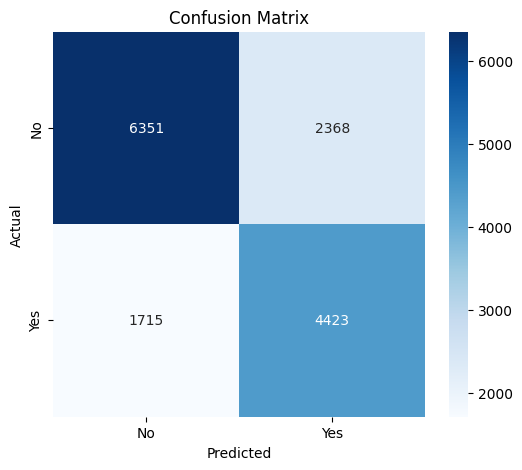

In [16]:
y_pred = simple_nn.predict(X_test)

y_pred_classes = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "NN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# DNN Model 
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.summary()

history = dnn_model.fit(
    X_train, y_train,  
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),  
    callbacks=[early_stopping]
)

test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7079 - loss: 0.5615 - val_accuracy: 0.7147 - val_loss: 0.5379
Epoch 2/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7159 - loss: 0.5506 - val_accuracy: 0.7222 - val_loss: 0.5374
Epoch 3/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7175 - loss: 0.5495 - val_accuracy: 0.7205 - val_loss: 0.5370
Epoch 4/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7182 - loss: 0.5473 - val_accuracy: 0.7219 - val_loss: 0.5357
Epoch 5/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7202 - loss: 0.5455 - val_accuracy: 0.7205 - val_loss: 0.5342
Epoch 6/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7190 - loss: 0.5447 - val_accuracy: 0.7224 - val_loss: 0.5343
Epoch 7/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7195 - loss: 0.5449 - val_accuracy: 0.7217 - val_loss: 0.5342
Epoch 8/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7205 - loss: 0.5437 - 

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
Accuracy: 0.7147


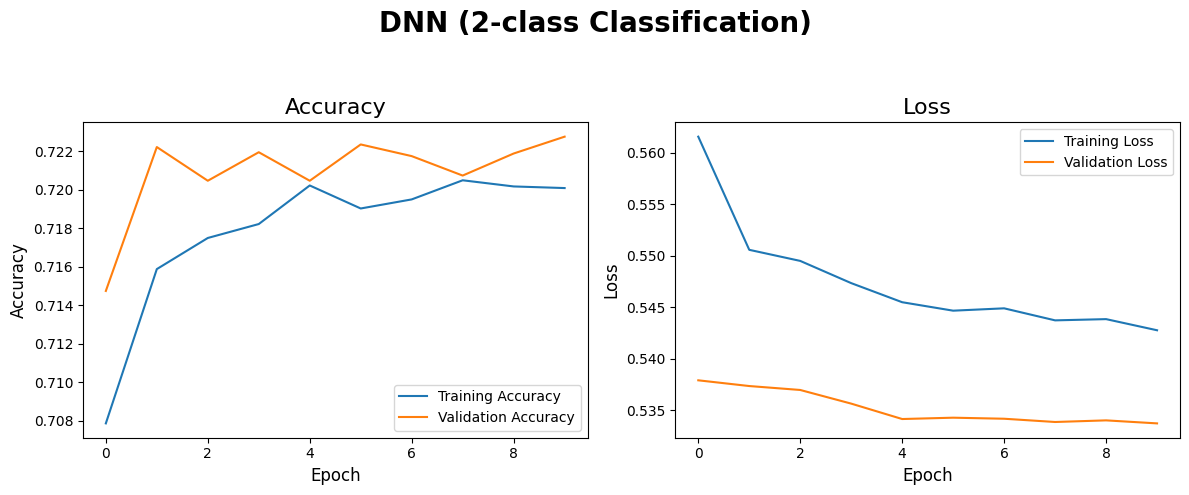

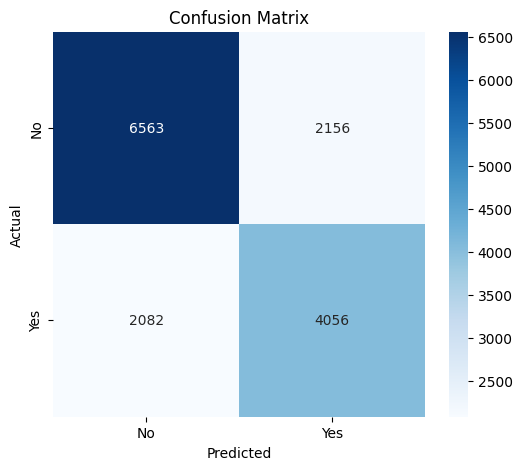

In [18]:
y_pred = dnn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)   

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "DNN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.summary()

history = ann_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,833 (34.50 KB)

 Trainable params: 8,833 (34.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 860us/step - accuracy: 0.7177 - loss: 0.5501 - val_accuracy: 0.7219 - val_loss: 0.5376
Epoch 2/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 811us/step - accuracy: 0.7219 - loss: 0.5437 - val_accuracy: 0.7236 - val_loss: 0.5365
Epoch 3/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 804us/step - accuracy: 0.7230 - loss: 0.5425 - val_accuracy: 0.7221 - val_loss: 0.5362
Epoch 4/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 825us/step - accuracy: 0.7234 - loss: 0.5417 - val_accuracy: 0.7223 - val_loss: 0.5362
Epoch 5/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 812us/step - accuracy: 0.7232 - loss: 0.5419 - val_accuracy: 0.7263 - val_loss: 0.5341
Epoch 6/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 809us/step - accuracy: 0.7236 - loss: 0.5408 - val_accuracy: 0.7227 - val_loss: 0.5384
Epoch 7/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 813us/step - accuracy: 0.7235 - loss: 0.5409 - val_accuracy: 0.7226 - val_loss: 0.5336
Epoch 8/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 826us/step - accuracy: 0.7239 -

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
Accuracy: 0.7219


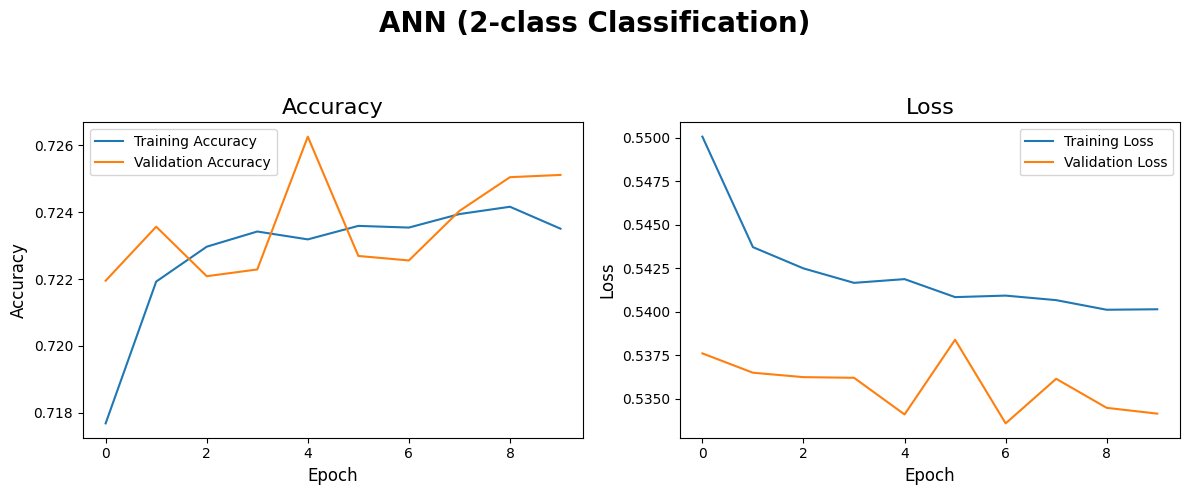

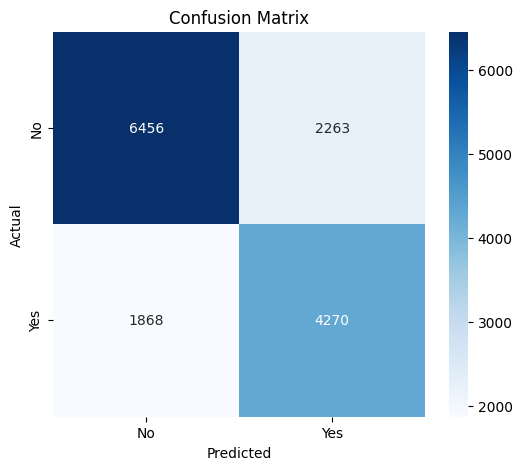

In [20]:
y_pred = ann_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "ANN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# MLP Model (ReLU → sigmoid)
mlp_model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)),  
    Dropout(0.3),
    Dense(64, activation='sigmoid'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.summary()

history = mlp_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,833 (34.50 KB)

 Trainable params: 8,833 (34.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 830us/step - accuracy: 0.6972 - loss: 0.5724 - val_accuracy: 0.7063 - val_loss: 0.5546
Epoch 2/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 828us/step - accuracy: 0.7096 - loss: 0.5560 - val_accuracy: 0.7125 - val_loss: 0.5445
Epoch 3/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 819us/step - accuracy: 0.7096 - loss: 0.5530 - val_accuracy: 0.7136 - val_loss: 0.5435
Epoch 4/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 823us/step - accuracy: 0.7132 - loss: 0.5511 - val_accuracy: 0.7145 - val_loss: 0.5418
Epoch 5/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - accuracy: 0.7144 - loss: 0.5490 - val_accuracy: 0.7169 - val_loss: 0.5402
Epoch 6/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - accuracy: 0.7173 - loss: 0.5470 - val_accuracy: 0.7194 - val_loss: 0.5392
Epoch 7/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 872us/step - accuracy: 0.7177 - loss: 0.5466 - val_accuracy: 0.7193 - val_loss: 0.5375
Epoch 8/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step - accuracy: 0.7194 -

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
Accuracy: 0.7063


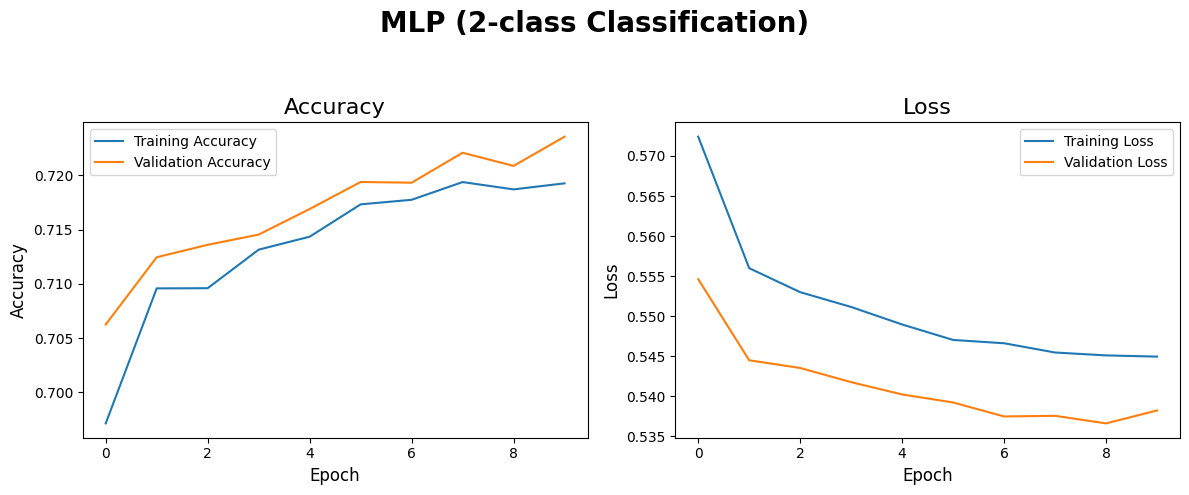

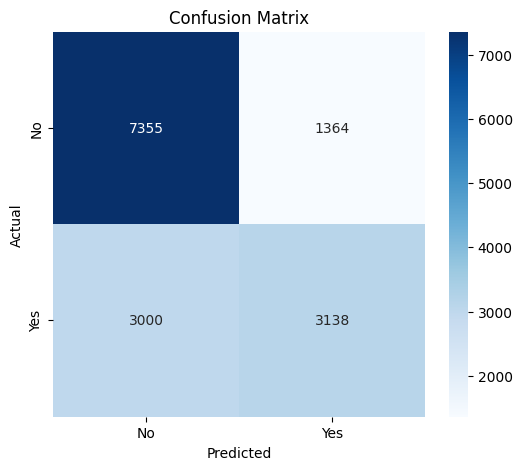

In [22]:
y_pred = mlp_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)   

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "MLP (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
X_train_np = X_train.values
X_test_np = X_test.values

X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))  
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

# CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=1, strides=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(
    X_train_reshaped, y_train,  
    epochs=50,
    batch_size=16,
    validation_data=(X_test_reshaped, y_test),  
    callbacks=[early_stopping]
)

test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7181 - loss: 0.5452 - val_accuracy: 0.7208 - val_loss: 0.5378
Epoch 2/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7224 - loss: 0.5397 - val_accuracy: 0.7219 - val_loss: 0.5362
Epoch 3/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7224 - loss: 0.5389 - val_accuracy: 0.7250 - val_loss: 0.5345
Epoch 4/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7233 - loss: 0.5383 - val_accuracy: 0.7250 - val_loss: 0.5345
Epoch 5/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7236 - loss: 0.5376 - val_accuracy: 0.7261 - val_loss: 0.5353
Epoch 6/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7240 - loss: 0.5372 - val_accuracy: 0.7260 - val_loss: 0.5371
Epoch 7/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7244 - loss: 0.5365 - val_accuracy: 0.7239 - val_loss: 0.5333
Epoch 8/50
3715/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7245 - loss: 0.5361 - 

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
Accuracy: 0.7208


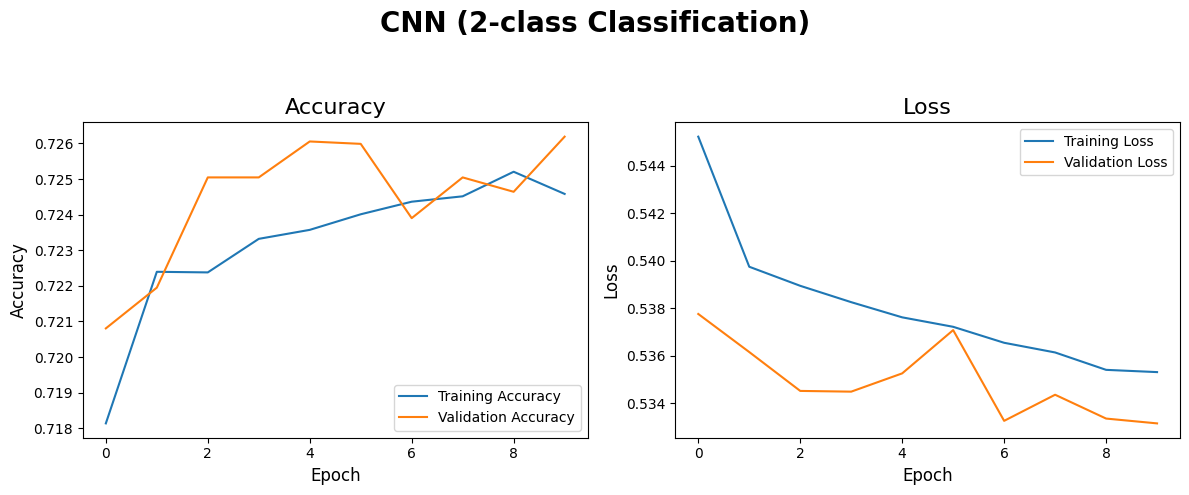

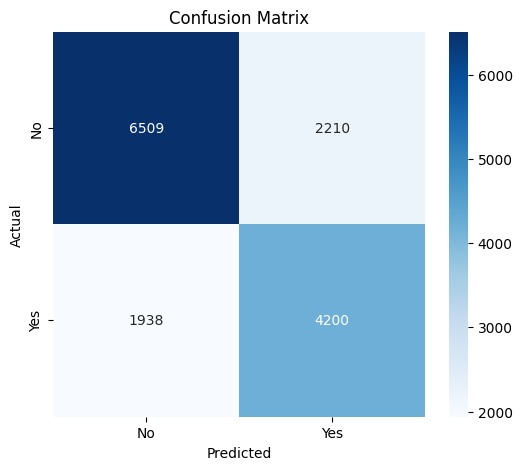

In [24]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "CNN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
def evaluate_model_on_test(model, X_test, y_test):
    if len(X_test.shape) == 2:  
        X_test_input = X_test
    else: 
        X_test_input = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    y_pred_prob = model.predict(X_test_input, verbose=0)

    y_pred = (y_pred_prob > 0.5).astype(int) 

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1

results_deep = []

models_dict = {
    "Simple NN": simple_nn,
    "DNN" : dnn_model,
    "ANN" : ann_model,
    "MLP": mlp_model,
    "CNN": cnn_model,
}

for model_name, model in models_dict.items():
    acc, precision, recall, f1 = evaluate_model_on_test(model, X_test, y_test)
    
    results_deep.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


results_df2 = pd.DataFrame(results_deep)
results_df2

,Model,Accuracy,Precision,Recall,F1-Score
0,Simple NN,0.725180,0.731161,0.725180,0.726774
1,DNN,0.714747,0.715276,0.714747,0.714994
2,ANN,0.721949,0.725192,0.721949,0.723061
3,MLP,0.706266,0.704806,0.706266,0.696281
4,CNN,0.720805,0.722917,0.720805,0.721619


# Conclusion


Best Model (Machine Learning):
Model        Decision Tree
Accuracy          0.726526
Precision         0.732357
Recall            0.726526
F1-Score          0.728094
Name: 2, dtype: object


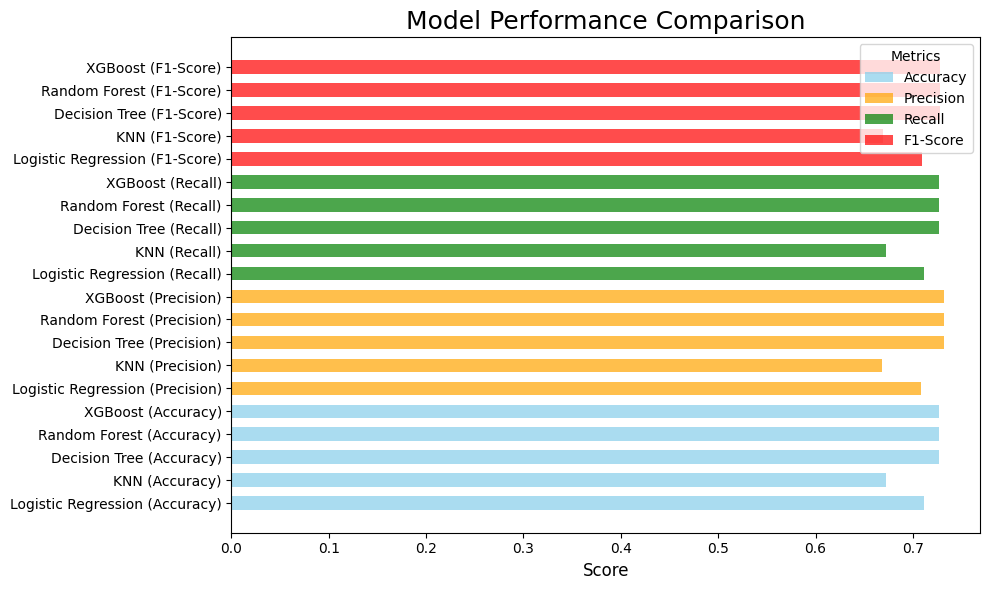


Optimal Model based on Accuracy: Decision Tree with Accuracy = 0.7265


In [26]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

offset = 0.3

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric, height=0.6)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


Best Model (Deep Learning):
Model             ANN
Accuracy     0.721949
Precision    0.725192
Recall       0.721949
F1-Score     0.723061
Name: 2, dtype: object


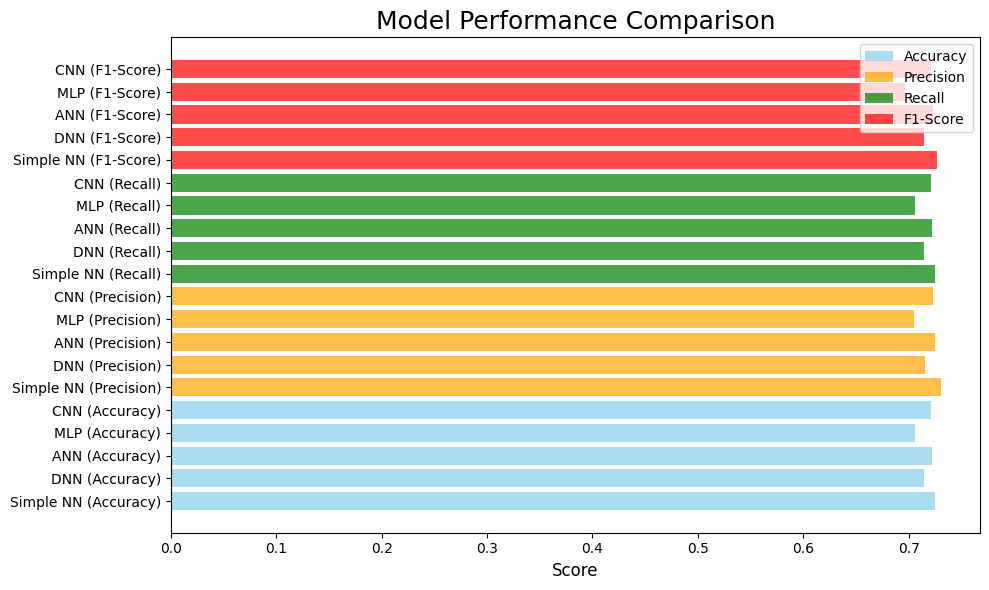


Optimal Model based on Accuracy: ANN with Accuracy = 0.7219


In [27]:
best_model2 = results_df2.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Deep Learning):")
print(best_model2)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df2['Model'] + f" ({metric})", results_df2[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")